<a id='2'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Import and Set up</b>

In [ ]:
import numpy as np
import pandas as pd

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio


import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

from collections import Counter




In [ ]:
df = pd.read_csv('UNSW_NB15_training-set.csv')

In [ ]:
df['label'].value_counts()

label
1    45332
0    37000
Name: count, dtype: int64

In [ ]:
df.head(10)

id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0   1  0.000011   udp       -   INT      2      0     496       0   
1   2  0.000008   udp       -   INT      2      0    1762       0   
2   3  0.000005   udp       -   INT      2      0    1068       0   
3   4  0.000006   udp       -   INT      2      0     900       0   
4   5  0.000010   udp       -   INT      2      0    2126       0   
5   6  0.000003   udp       -   INT      2      0     784       0   
6   7  0.000006   udp       -   INT      2      0    1960       0   
7   8  0.000028   udp       -   INT      2      0    1384       0   
8   9  0.000000   arp       -   INT      1      0      46       0   
9  10  0.000000   arp       -   INT      1      0      46       0   

           rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0   90909.09020  ...                 1               2             0   
1  125000.00030  ...                 1               2             0   
2  200000.00510  ...                 1               3             0   
3  166666.66080  ...                 1               3             0   
4  100000.00250  ...                 1               3             0   
5  333333.32150  ...                 1               2             0   
6  166666.66080  ...                 1               2             0   
7   35714.28522  ...                 1               3             0   
8       0.00000  ...                 2               2             0   
9       0.00000  ...                 2               2             0   

   ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0           0                 0           1           2                0   
1           0                 0           1           2                0   
2           0                 0           1           3                0   
3           0                 0           2           3                0   
4           0                 0           2           3                0   
5           0                 0           2           2                0   
6           0                 0           2           2                0   
7           0                 0           1           3                0   
8           0                 0           2           2                1   
9           0                 0           2           2                1   

   attack_cat  label  
0      Normal      0  
1      Normal      0  
2      Normal      0  
3      Normal      0  
4      Normal      0  
5      Normal      0  
6      Normal      0  
7      Normal      0  
8      Normal      0  
9      Normal      0  

[10 rows x 45 columns]

In [ ]:
df.describe(include='all')

id           dur  proto service  state         spkts  \
count   82332.000000  82332.000000  82332   82332  82332  82332.000000   
unique           NaN           NaN    131      13      7           NaN   
top              NaN           NaN    tcp       -    FIN           NaN   
freq             NaN           NaN  43095   47153  39339           NaN   
mean    41166.500000      1.006756    NaN     NaN    NaN     18.666472   
std     23767.345519      4.710444    NaN     NaN    NaN    133.916353   
min         1.000000      0.000000    NaN     NaN    NaN      1.000000   
25%     20583.750000      0.000008    NaN     NaN    NaN      2.000000   
50%     41166.500000      0.014138    NaN     NaN    NaN      6.000000   
75%     61749.250000      0.719360    NaN     NaN    NaN     12.000000   
max     82332.000000     59.999989    NaN     NaN    NaN  10646.000000   

               dpkts        sbytes        dbytes          rate  ...  \
count   82332.000000  8.233200e+04  8.233200e+04  8.233200e+04  ...   
unique           NaN           NaN           NaN           NaN  ...   
top              NaN           NaN           NaN           NaN  ...   
freq             NaN           NaN           NaN           NaN  ...   
mean       17.545936  7.993908e+03  1.323379e+04  8.241089e+04  ...   
std       115.574086  1.716423e+05  1.514715e+05  1.486204e+05  ...   
min         0.000000  2.400000e+01  0.000000e+00  0.000000e+00  ...   
25%         0.000000  1.140000e+02  0.000000e+00  2.860611e+01  ...   
50%         2.000000  5.340000e+02  1.780000e+02  2.650177e+03  ...   
75%        10.000000  1.280000e+03  9.560000e+02  1.111111e+05  ...   
max     11018.000000  1.435577e+07  1.465753e+07  1.000000e+06  ...   

        ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login    ct_ftp_cmd  \
count       82332.000000    82332.000000  82332.000000  82332.000000   
unique               NaN             NaN           NaN           NaN   
top                  NaN             NaN           NaN           NaN   
freq                 NaN             NaN           NaN           NaN   
mean            3.663011        7.456360      0.008284      0.008381   
std             5.915386       11.415191      0.091171      0.092485   
min             1.000000        1.000000      0.000000      0.000000   
25%             1.000000        1.000000      0.000000      0.000000   
50%             1.000000        3.000000      0.000000      0.000000   
75%             3.000000        6.000000      0.000000      0.000000   
max            38.000000       63.000000      2.000000      2.000000   

        ct_flw_http_mthd    ct_src_ltm    ct_srv_dst  is_sm_ips_ports  \
count       82332.000000  82332.000000  82332.000000     82332.000000   
unique               NaN           NaN           NaN              NaN   
top                  NaN           NaN           NaN              NaN   
freq                 NaN           NaN           NaN              NaN   
mean            0.129743      6.468360      9.164262         0.011126   
std             0.638683      8.543927     11.121413         0.104891   
min             0.000000      1.000000      1.000000         0.000000   
25%             0.000000      1.000000      2.000000         0.000000   
50%             0.000000      3.000000      5.000000         0.000000   
75%             0.000000      7.000000     11.000000         0.000000   
max            16.000000     60.000000     62.000000         1.000000   

        attack_cat         label  
count        82332  82332.000000  
unique          10           NaN  
top         Normal           NaN  
freq         37000           NaN  
mean           NaN      0.550600  
std            NaN      0.497436  
min            NaN      0.000000  
25%            NaN      0.000000  
50%            NaN      1.000000  
75%            NaN      1.000000  
max            NaN      1.000000  

[11 rows x 45 columns]

In [ ]:
df.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

<a id='3'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Pre-processing and Feature Selection</b>

## Drop irrelevant or excess feastures

The first feature to drop is 'id'. This feature is an index and not descriptive.

The second feature to drop is 'attack_cat'. This feature is an extension of the target feature, therefore using it will give us 100% predictions but will not give us a generalizable model.

The other features to be dropped are those that were too strongly correlated. In this current version none of them were dropped, as the model is first evaluated to see how well it can perform.

In [ ]:
list_drop = ['id','attack_cat']

In [ ]:
df.drop(list_drop,axis=1,inplace=True)

## Apply Clamping

The extreme values should be pruned to reduce the skewness of some distributions. The logic applied here is that the features with a maximum value more than ten times the median value is pruned to the 95th percentile. If the 95th percentile is close to the maximum, then the tail has more interesting information than what we want to discard.

The clamping is also only applied to features with a maximum of more than 10 times the median. This prevents the bimodals and small value distributions from being excessively pruned.  

In [ ]:
# Clamp extreme Values
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe(include='all')

dur         spkts         dpkts        sbytes        dbytes  \
count  82332.000000  82332.000000  82332.000000  8.233200e+04  8.233200e+04   
mean       1.006756     18.666472     17.545936  7.993908e+03  1.323379e+04   
std        4.710444    133.916353    115.574086  1.716423e+05  1.514715e+05   
min        0.000000      1.000000      0.000000  2.400000e+01  0.000000e+00   
25%        0.000008      2.000000      0.000000  1.140000e+02  0.000000e+00   
50%        0.014138      6.000000      2.000000  5.340000e+02  1.780000e+02   
75%        0.719360     12.000000     10.000000  1.280000e+03  9.560000e+02   
max       59.999989  10646.000000  11018.000000  1.435577e+07  1.465753e+07   

               rate          sttl          dttl         sload         dload  \
count  8.233200e+04  82332.000000  82332.000000  8.233200e+04  8.233200e+04   
mean   8.241089e+04    180.967667     95.713003  6.454902e+07  6.305470e+05   
std    1.486204e+05    101.513358    116.667722  1.798618e+08  2.393001e+06   
min    0.000000e+00      0.000000      0.000000  0.000000e+00  0.000000e+00   
25%    2.860611e+01     62.000000      0.000000  1.120247e+04  0.000000e+00   
50%    2.650177e+03    254.000000     29.000000  5.770032e+05  2.112951e+03   
75%    1.111111e+05    254.000000    252.000000  6.514286e+07  1.585808e+04   
max    1.000000e+06    255.000000    253.000000  5.268000e+09  2.082111e+07   

       ...  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
count  ...      82332.000000      82332.000000    82332.000000  82332.000000   
mean   ...          4.928898          3.663011        7.456360      0.008284   
std    ...          8.389545          5.915386       11.415191      0.091171   
min    ...          1.000000          1.000000        1.000000      0.000000   
25%    ...          1.000000          1.000000        1.000000      0.000000   
50%    ...          1.000000          1.000000        3.000000      0.000000   
75%    ...          4.000000          3.000000        6.000000      0.000000   
max    ...         59.000000         38.000000       63.000000      2.000000   

         ct_ftp_cmd  ct_flw_http_mthd    ct_src_ltm    ct_srv_dst  \
count  82332.000000      82332.000000  82332.000000  82332.000000   
mean       0.008381          0.129743      6.468360      9.164262   
std        0.092485          0.638683      8.543927     11.121413   
min        0.000000          0.000000      1.000000      1.000000   
25%        0.000000          0.000000      1.000000      2.000000   
50%        0.000000          0.000000      3.000000      5.000000   
75%        0.000000          0.000000      7.000000     11.000000   
max        2.000000         16.000000     60.000000     62.000000   

       is_sm_ips_ports         label  
count     82332.000000  82332.000000  
mean          0.011126      0.550600  
std           0.104891      0.497436  
min           0.000000      0.000000  
25%           0.000000      0.000000  
50%           0.000000      1.000000  
75%           0.000000      1.000000  
max           1.000000      1.000000  

[8 rows x 40 columns]

In [ ]:
DEBUG =0

for feature in df_numeric.columns:
    if DEBUG == 1:
        print(feature)
        print('max = '+str(df_numeric[feature].max()))
        print('75th = '+str(df_numeric[feature].quantile(0.95)))
        print('median = '+str(df_numeric[feature].median()))
        print(df_numeric[feature].max()>10*df_numeric[feature].median())
        print('----------------------------------------------------')
    if df_numeric[feature].max()>10*df_numeric[feature].median() and df_numeric[feature].max()>10 :
        df[feature] = np.where(df[feature]<df[feature].quantile(0.95), df[feature], df[feature].quantile(0.95))

In [ ]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe(include='all')

dur        spkts         dpkts        sbytes        dbytes  \
count  82332.000000  82332.00000  82332.000000  82332.000000  82332.000000   
mean       0.445016     11.84186      9.178424   1580.566135   2866.918367   
std        0.672222     15.66461     14.504212   2948.850472   7525.606738   
min        0.000000      1.00000      0.000000     24.000000      0.000000   
25%        0.000008      2.00000      0.000000    114.000000      0.000000   
50%        0.014138      6.00000      2.000000    534.000000    178.000000   
75%        0.719360     12.00000     10.000000   1280.000000    956.000000   
max        2.403792     60.00000     54.000000  12472.000000  30622.000000   

                rate          sttl          dttl         sload         dload  \
count   82332.000000  82332.000000  82332.000000  8.233200e+04  8.233200e+04   
mean    71576.702810    180.967667     95.713003  4.649418e+07  3.105380e+05   
std    102631.946851    101.513358    116.667722  7.417784e+07  8.918691e+05   
min         0.000000      0.000000      0.000000  0.000000e+00  0.000000e+00   
25%        28.606114     62.000000      0.000000  1.120247e+04  0.000000e+00   
50%      2650.176667    254.000000     29.000000  5.770032e+05  2.112951e+03   
75%    111111.107200    254.000000    252.000000  6.514286e+07  1.585808e+04   
max    333333.321500    255.000000    253.000000  2.666667e+08  3.741446e+06   

       ...  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
count  ...      82332.000000      82332.000000    82332.000000  82332.000000   
mean   ...          4.466611          3.388901        7.160679      0.008284   
std    ...          6.685037          5.029129       10.481621      0.091171   
min    ...          1.000000          1.000000        1.000000      0.000000   
25%    ...          1.000000          1.000000        1.000000      0.000000   
50%    ...          1.000000          1.000000        3.000000      0.000000   
75%    ...          4.000000          3.000000        6.000000      0.000000   
max    ...         25.000000         18.000000       37.000000      2.000000   

         ct_ftp_cmd  ct_flw_http_mthd    ct_src_ltm    ct_srv_dst  \
count  82332.000000      82332.000000  82332.000000  82332.000000   
mean       0.008381          0.092066      5.974809      8.832532   
std        0.092485          0.289121      6.867156     10.124902   
min        0.000000          0.000000      1.000000      1.000000   
25%        0.000000          0.000000      1.000000      2.000000   
50%        0.000000          0.000000      3.000000      5.000000   
75%        0.000000          0.000000      7.000000     11.000000   
max        2.000000          1.000000     25.000000     36.000000   

       is_sm_ips_ports         label  
count     82332.000000  82332.000000  
mean          0.011126      0.550600  
std           0.104891      0.497436  
min           0.000000      0.000000  
25%           0.000000      0.000000  
50%           0.000000      1.000000  
75%           0.000000      1.000000  
max           1.000000      1.000000  

[8 rows x 40 columns]

## Apply log function to nearly all numeric, since they are all mostly skewed to the right

It would have been too much of a slog to apply the log function individually, therefore a simple rule has been set up: if the number of unique values in the continuous feature is more than 50 then apply the log function. The reason more than 50 unique values are sought is to filter out the integer based features that act more categorically.  

In [ ]:
df_numeric = df.select_dtypes(include=[np.number])
df_before = df_numeric.copy()
DEBUG = 0
for feature in df_numeric.columns:
    if DEBUG == 1:
        print(feature)
        print('nunique = '+str(df_numeric[feature].nunique()))
        print(df_numeric[feature].nunique()>50)
        print('----------------------------------------------------')
    if df_numeric[feature].nunique()>50:
        if df_numeric[feature].min()==0:
            df[feature] = np.log(df[feature]+1)
        else:
            df[feature] = np.log(df[feature])

df_numeric = df.select_dtypes(include=[np.number])

## Reduce the labels in catagorical features

Some features have very high cardinalities, and this section reduces the cardinality to 5 or 6 per feature. The logic is to take the top 5 occuring labels in the feature as the labels and set the remainder to '-' (seldom used) labels. When the encoding is done later on, the dimensionality will not explode and cause the curse of dimensionality.

In [ ]:
df_cat = df.select_dtypes(exclude=[np.number])
df_cat.describe(include='all')

proto service  state
count   82332   82332  82332
unique    131      13      7
top       tcp       -    FIN
freq    43095   47153  39339

In [ ]:
DEBUG = 0
for feature in df_cat.columns:
    if DEBUG == 1:
        print(feature)
        print('nunique = '+str(df_cat[feature].nunique()))
        print(df_cat[feature].nunique()>6)
        print(sum(df[feature].isin(df[feature].value_counts().head().index)))
        print('----------------------------------------------------')

    if df_cat[feature].nunique()>6:
        df[feature] = np.where(df[feature].isin(df[feature].value_counts().head().index), df[feature], '-')

In [ ]:
df_cat = df.select_dtypes(exclude=[np.number])
df_cat.describe(include='all')

proto service  state
count   82332   82332  82332
unique      6       5      6
top       tcp       -    FIN
freq    43095   49275  39339

In [ ]:
df['proto'].value_counts().head().index

Index(['tcp', 'udp', '-', 'unas', 'arp'], dtype='object', name='proto')

In [ ]:
df['proto'].value_counts().index

Index(['tcp', 'udp', '-', 'unas', 'arp', 'ospf'], dtype='object', name='proto')

## View before and after of features

This section simply displays the distributions within features before and after the transformations.  

## Best Features

This section does an analysis (univariate statistical tests) to determine which features best predict the target feature.

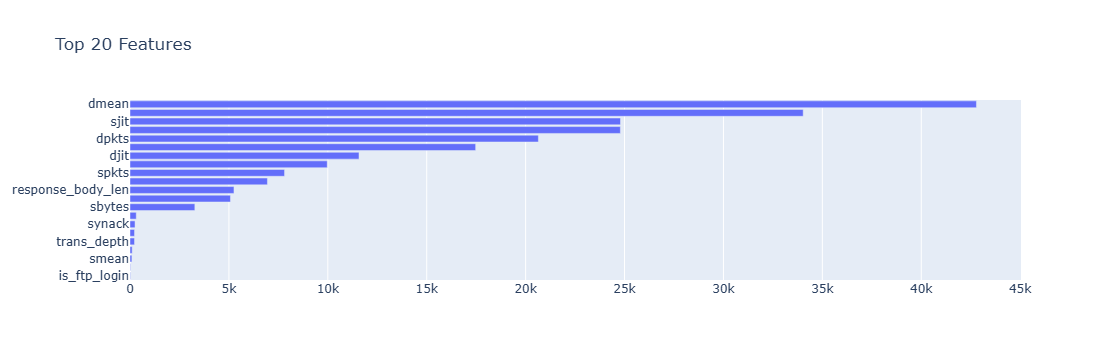

In [ ]:
# Feature Selection
from sklearn.feature_selection import SelectKBest, chi2

best_features = SelectKBest(score_func=chi2,k='all')

X = df.iloc[:,4:-2]
y = df.iloc[:,-1]
fit = best_features.fit(X,y)

df_scores=pd.DataFrame(fit.scores_)
df_col=pd.DataFrame(X.columns)

feature_score=pd.concat([df_col,df_scores],axis=1)
feature_score.columns=['feature','score']
feature_score.sort_values(by=['score'],ascending=True,inplace=True)

fig = go.Figure(go.Bar(
            x=feature_score['score'][0:21],
            y=feature_score['feature'][0:21],
            orientation='h'))

fig.update_layout(title="Top 20 Features",
                  height=1200,
                  showlegend=False,
                 )

fig.show()

## Encode categorical features

The categorical features must be encoded to ensure that the models can interpret them. One-hot encoding is used since none of the categorical features are ordinal.  

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
X.head()
feature_names = list(X.columns)
np.shape(X)

(82332, 42)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
np.shape(X)

(82332, 56)

In [ ]:
df_cat.describe(include='all')

proto service  state
count   82332   82332  82332
unique      6       5      6
top       tcp       -    FIN
freq    43095   49275  39339

In [ ]:
X[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 1.09999395e-05, 6.93147181e-01, 0.00000000e+00,
       6.20657593e+00, 0.00000000e+00, 1.14176263e+01, 2.54000000e+02,
       0.00000000e+00, 1.90104856e+01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.09399400e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.51342875e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.00000000e+00, 2.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 2.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 2.00000000e+00, 0.00000000e+00])

In [ ]:
len(feature_names)

42

In [ ]:
for label in list(df_cat['state'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)

for label in list(df_cat['service'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)

for label in list(df_cat['proto'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)

In [ ]:
len(feature_names)

56

<a id='4'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Modelling and Evaluation</b>

## Prep for Modelling

### Split test and training
In this section the data is split into test and training sets using stratified sampling.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 0,
                                                    stratify=y)

### Standardize continuous features
a standard scaler is used on the continuous features to put them all in the same order of size.

In [ ]:
df_cat.describe(include='all')

proto service  state
count   82332   82332  82332
unique      6       5      6
top       tcp       -    FIN
freq    43095   49275  39339

In [ ]:
# 6 + 5 + 6 unique = 17, therefore the first 17 rows will be the categories that have been encoded, start scaling from row 18 only.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 18:] = sc.fit_transform(X_train[:, 18:])
X_test[:, 18:] = sc.transform(X_test[:, 18:])

In [ ]:

from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

Handling class imbalance using SMOTE based technique

A)SMOTE technique

In [ ]:
from imblearn.over_sampling import SMOTE

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({1: 36265, 0: 29600})
After Counter({0: 36265, 1: 36265})


B) ADASYN Technique

In [ ]:
from imblearn.over_sampling import ADASYN

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using ADASYN
ada = ADASYN(random_state=130)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

counter = Counter(y_train_ada)
print('After',counter)

Before Counter({1: 36265, 0: 29600})
After Counter({0: 36451, 1: 36265})


Hybrid Techniques

C.1) SMOTE + Tomek Links

In [ ]:
from imblearn.combine import SMOTETomek

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=139)
X_train_smtom, y_train_smtom = smtom.fit_resample(X_train, y_train)

counter = Counter(y_train_smtom)
print('After',counter)


Before Counter({1: 36265, 0: 29600})
After Counter({0: 35798, 1: 35798})


C.2) SMOTE + ENN

In [ ]:
from imblearn.combine import SMOTEENN

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN()
X_train_smenn, y_train_smenn = smenn.fit_resample(X_train, y_train)

counter = Counter(y_train_smenn)
print('After',counter)

Before Counter({1: 36265, 0: 29600})
After Counter({0: 32968, 1: 32500})


In [ ]:
model = list()
resample = list()
precision = list()
recall = list()
F1score = list()
AUCROC = list()

In [ ]:

def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):
    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    print('Confusion Matrix')
    print('='*60)
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1]))

    model.append(algo)
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    F1score.append(f1_score(y_test,y_pred))
    AUCROC.append(roc_auc_score(y_test, y_prob[:,1]))
    resample.append(sampling)

<a id='4_1'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Logistical Classification</b>

Orignal unsampled data

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
log_model = LogisticRegression()

# Update the parameter grid to ensure valid combinations
params = {
    'C': np.logspace(-3, 1, 5),
    'class_weight': [None, 'balanced'],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # Solvers supporting both l1 and l2 penalties
}

# Stratified K-Fold cross-validator
cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)

# Create grid search using 5-fold cross-validation
clf_LR = RandomizedSearchCV(log_model, params, n_iter=20, cv=cv, scoring='roc_auc', n_jobs=-1, random_state=42)
clf_LR.fit(X_train, y_train)
clf_LR.best_estimator_

LogisticRegression(C=10.0, solver='liblinear')

In [ ]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'actual')

Confusion Matrix
[[6930  470]
 [ 674 8393]] 

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      7400
           1       0.95      0.93      0.94      9067

    accuracy                           0.93     16467
   macro avg       0.93      0.93      0.93     16467
weighted avg       0.93      0.93      0.93     16467
 

AUC-ROC
0.9829141615421532


SMOTE Resampling

In [ ]:
clf_LR.fit(X_train_sm, y_train_sm)
clf_LR.best_estimator_

LogisticRegression(C=10.0, solver='liblinear')

In [ ]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'smote')

Confusion Matrix
[[7045  355]
 [ 778 8289]] 

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      7400
           1       0.96      0.91      0.94      9067

    accuracy                           0.93     16467
   macro avg       0.93      0.93      0.93     16467
weighted avg       0.93      0.93      0.93     16467
 

AUC-ROC
0.9832329743441468


ADASYN Resampling

In [ ]:
clf_LR.fit(X_train_ada, y_train_ada)
clf_LR.best_estimator_

LogisticRegression(C=10.0, solver='liblinear')

In [ ]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'adasyn')


Confusion Matrix
[[7216  184]
 [1062 8005]] 

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      7400
           1       0.98      0.88      0.93      9067

    accuracy                           0.92     16467
   macro avg       0.92      0.93      0.92     16467
weighted avg       0.93      0.92      0.92     16467
 

AUC-ROC
0.9829501697572726


SMOTE + Tomek Resampling

In [ ]:
clf_LR.fit(X_train_smtom, y_train_smtom)
clf_LR.best_estimator_

LogisticRegression(C=10.0, solver='liblinear')

In [ ]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'smote+tomek')


Confusion Matrix
[[7052  348]
 [ 794 8273]] 

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      7400
           1       0.96      0.91      0.94      9067

    accuracy                           0.93     16467
   macro avg       0.93      0.93      0.93     16467
weighted avg       0.93      0.93      0.93     16467
 

AUC-ROC
0.9829424792609969


SMOTE + ENN Resampling

In [ ]:
clf_LR.fit(X_train_smenn, y_train_smenn)
clf_LR.best_estimator_

LogisticRegression(C=10.0, solver='liblinear')

In [ ]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'smote+enn')


Confusion Matrix
[[7098  302]
 [ 996 8071]] 

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      7400
           1       0.96      0.89      0.93      9067

    accuracy                           0.92     16467
   macro avg       0.92      0.92      0.92     16467
weighted avg       0.92      0.92      0.92     16467
 

AUC-ROC
0.978809910605433


<a id='4_3'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Decision Tree</b>


In [ ]:
estimators = [2,10,30,50,100]
# Maximum number of depth in each tree:
max_depth = [i for i in range(5,16,2)]
# Minimum number of samples to consider to split a node:
min_samples_split = [2, 5, 10, 15, 20, 50, 100]
# Minimum number of samples to consider at each leaf node:
min_samples_leaf = [1, 2, 5]
tree_model = DecisionTreeClassifier()

tree_param_grid = {
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

clf_DT = RandomizedSearchCV(tree_model, tree_param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=2)
clf_DT.fit(X_train, y_train)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=11, min_samples_leaf=5, min_samples_split=15)

In [ ]:

test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'actual')

Confusion Matrix
[[7209  191]
 [ 381 8686]] 

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      7400
           1       0.98      0.96      0.97      9067

    accuracy                           0.97     16467
   macro avg       0.96      0.97      0.96     16467
weighted avg       0.97      0.97      0.97     16467
 

AUC-ROC
0.99294793414789


SMOTE Resampling

In [ ]:
clf_DT.fit(X_train_sm, y_train_sm)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=50)

In [ ]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'smote')

Confusion Matrix
[[7173  227]
 [ 327 8740]] 

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      7400
           1       0.97      0.96      0.97      9067

    accuracy                           0.97     16467
   macro avg       0.97      0.97      0.97     16467
weighted avg       0.97      0.97      0.97     16467
 

AUC-ROC
0.9917013061920418


ADASYN Resampling

In [ ]:

clf_DT.fit(X_train_ada, y_train_ada)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=13, min_samples_split=50)

In [ ]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'adasyn')

Confusion Matrix
[[7227  173]
 [ 375 8692]] 

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      7400
           1       0.98      0.96      0.97      9067

    accuracy                           0.97     16467
   macro avg       0.97      0.97      0.97     16467
weighted avg       0.97      0.97      0.97     16467
 

AUC-ROC
0.9926441297368838


SMOTE + Tomek Resampling

In [ ]:
clf_DT.fit(X_train_smtom, y_train_smtom)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=13, min_samples_leaf=5, min_samples_split=100)

In [ ]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'smote+tomek')


Confusion Matrix
[[7186  214]
 [ 370 8697]] 

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      7400
           1       0.98      0.96      0.97      9067

    accuracy                           0.96     16467
   macro avg       0.96      0.97      0.96     16467
weighted avg       0.96      0.96      0.96     16467
 

AUC-ROC
0.993187323200558


SMOTE + ENN Resampling

In [ ]:
clf_DT.fit(X_train_smenn, y_train_smenn)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=50)

In [ ]:

test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'smote+enn')

Confusion Matrix
[[7209  191]
 [ 503 8564]] 

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7400
           1       0.98      0.94      0.96      9067

    accuracy                           0.96     16467
   macro avg       0.96      0.96      0.96     16467
weighted avg       0.96      0.96      0.96     16467
 

AUC-ROC
0.9810888610017319


<a id='4_4'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Extra Trees</b>

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
tree_model = ExtraTreesClassifier(random_state=0,n_jobs=-1)

tree_param_grid = {
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

clf_DT = RandomizedSearchCV(tree_model, tree_param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=2)
clf_DT.fit(X_train, y_train)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


ExtraTreesClassifier(max_depth=15, min_samples_split=20, n_jobs=-1,
                     random_state=0)

In [ ]:

test_eval(clf_DT, X_test, y_test, 'Extra Tree', 'actual')

Confusion Matrix
[[7233  167]
 [ 747 8320]] 

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7400
           1       0.98      0.92      0.95      9067

    accuracy                           0.94     16467
   macro avg       0.94      0.95      0.94     16467
weighted avg       0.95      0.94      0.94     16467
 

AUC-ROC
0.9925894690874838


SMOTE Resampling

In [ ]:
clf_DT.fit(X_train_sm, y_train_sm)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


ExtraTreesClassifier(max_depth=15, n_jobs=-1, random_state=0)

In [ ]:

test_eval(clf_DT, X_test, y_test, 'Extra Tree', 'smote')

Confusion Matrix
[[7324   76]
 [ 949 8118]] 

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.99      0.93      7400
           1       0.99      0.90      0.94      9067

    accuracy                           0.94     16467
   macro avg       0.94      0.94      0.94     16467
weighted avg       0.94      0.94      0.94     16467
 

AUC-ROC
0.9927581830755426


ADASYN Resampling

In [ ]:

clf_DT.fit(X_train_ada, y_train_ada)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


ExtraTreesClassifier(max_depth=15, n_jobs=-1, random_state=0)

In [ ]:
test_eval(clf_DT, X_test, y_test, 'Extra Tree', 'adasyn')


Confusion Matrix
[[7379   21]
 [1204 7863]] 

Classification Report
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      7400
           1       1.00      0.87      0.93      9067

    accuracy                           0.93     16467
   macro avg       0.93      0.93      0.93     16467
weighted avg       0.94      0.93      0.93     16467
 

AUC-ROC
0.9924052995865613


SMOTE + Tomek Resampling

In [ ]:

clf_DT.fit(X_train_smtom, y_train_smtom)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


ExtraTreesClassifier(max_depth=13, min_samples_split=5, n_jobs=-1,
                     random_state=0)

In [ ]:
test_eval(clf_DT, X_test, y_test, 'Extra Tree', 'smote+tomek')

Confusion Matrix
[[7317   83]
 [1074 7993]] 

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      7400
           1       0.99      0.88      0.93      9067

    accuracy                           0.93     16467
   macro avg       0.93      0.94      0.93     16467
weighted avg       0.94      0.93      0.93     16467
 

AUC-ROC
0.9903335231117297


SMOTE + ENN Resampling

In [ ]:
clf_DT.fit(X_train_smenn, y_train_smenn)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


ExtraTreesClassifier(max_depth=13, n_jobs=-1, random_state=0)

In [ ]:
test_eval(clf_DT, X_test, y_test, 'Extra Tree', 'smote+enn')

Confusion Matrix
[[7312   88]
 [1153 7914]] 

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      7400
           1       0.99      0.87      0.93      9067

    accuracy                           0.92     16467
   macro avg       0.93      0.93      0.92     16467
weighted avg       0.93      0.92      0.92     16467
 

AUC-ROC
0.9878167262332366


<a id='4_5'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Random Forest</b>

In [ ]:

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

rf_params={'n_estimators':estimators,
           'max_depth':max_depth,
           'min_samples_split':min_samples_split}

clf_RF = RandomizedSearchCV(rf_model, rf_params, cv=cv, scoring='roc_auc', n_jobs=-1, n_iter=20, verbose=2)
clf_RF.fit(X_train, y_train)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(max_depth=15, min_samples_split=10, n_estimators=50)

In [ ]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'actual')


Confusion Matrix
[[7232  168]
 [ 295 8772]] 

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      7400
           1       0.98      0.97      0.97      9067

    accuracy                           0.97     16467
   macro avg       0.97      0.97      0.97     16467
weighted avg       0.97      0.97      0.97     16467
 

AUC-ROC
0.9962224982785808


SMOTE Resampling

In [ ]:
clf_RF.fit(X_train_sm, y_train_sm)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(max_depth=13)

In [ ]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'smote')

Confusion Matrix
[[7243  157]
 [ 403 8664]] 

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      7400
           1       0.98      0.96      0.97      9067

    accuracy                           0.97     16467
   macro avg       0.96      0.97      0.97     16467
weighted avg       0.97      0.97      0.97     16467
 

AUC-ROC
0.9955681503164132


ADASYN Resampling

In [ ]:
clf_RF.fit(X_train_ada, y_train_ada)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(max_depth=15, min_samples_split=10)

In [ ]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'adasyn')

Confusion Matrix
[[7277  123]
 [ 368 8699]] 

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      7400
           1       0.99      0.96      0.97      9067

    accuracy                           0.97     16467
   macro avg       0.97      0.97      0.97     16467
weighted avg       0.97      0.97      0.97     16467
 

AUC-ROC
0.9959228521010257


SMOTE + Tomek Resampling

In [ ]:
clf_RF.fit(X_train_smtom, y_train_smtom)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(max_depth=15, min_samples_split=50, n_estimators=30)

In [ ]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'smote+tomek')

Confusion Matrix
[[7223  177]
 [ 383 8684]] 

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      7400
           1       0.98      0.96      0.97      9067

    accuracy                           0.97     16467
   macro avg       0.96      0.97      0.97     16467
weighted avg       0.97      0.97      0.97     16467
 

AUC-ROC
0.9952650389443154


SMOTE + ENN Resampling

In [ ]:
clf_RF.fit(X_train_smenn, y_train_smenn)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(max_depth=15, n_estimators=50)

In [ ]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'smote+enn')


Confusion Matrix
[[7286  114]
 [ 514 8553]] 

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      7400
           1       0.99      0.94      0.96      9067

    accuracy                           0.96     16467
   macro avg       0.96      0.96      0.96     16467
weighted avg       0.96      0.96      0.96     16467
 

AUC-ROC
0.9946659179859246


<a id='5'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Evaluate</b>

The models are compared in this chapter to determine which give the best performance. It seems that the winner is the Random Forest with a good performance on speed and prediction.

The MLP takes much longer to train in Keras than through sci-kit learn. I don't think that the verbosity of the output could have such a big impact. It is unclear why Keras is underperforming.

In [ ]:

clf_eval_df = pd.DataFrame({'model':model,
                            'resample':resample,
                            'precision':precision,
                            'recall':recall,
                            'f1-score':F1score,
                            'AUC-ROC':AUCROC})

In [ ]:
clf_eval_df

model     resample  precision    recall  f1-score   AUC-ROC
0   Logistic Regression       actual   0.946971  0.925664  0.936196  0.982914
1   Logistic Regression        smote   0.958931  0.914194  0.936028  0.983233
2   Logistic Regression       adasyn   0.977531  0.882872  0.927793  0.982950
3   Logistic Regression  smote+tomek   0.959633  0.912430  0.935436  0.982942
4   Logistic Regression    smote+enn   0.963932  0.890151  0.925573  0.978810
5         Decision Tree       actual   0.978484  0.957979  0.968123  0.992948
6         Decision Tree        smote   0.974685  0.963935  0.969280  0.991701
7         Decision Tree       adasyn   0.980485  0.958641  0.969440  0.992644
8         Decision Tree  smote+tomek   0.975985  0.959193  0.967516  0.993187
9         Decision Tree    smote+enn   0.978184  0.944524  0.961059  0.981089
10           Extra Tree       actual   0.980323  0.917613  0.947932  0.992589
11           Extra Tree        smote   0.990725  0.895335  0.940618  0.992758
12           Extra Tree       adasyn   0.997336  0.867211  0.927733  0.992405
13           Extra Tree  smote+tomek   0.989723  0.881548  0.932509  0.990334
14           Extra Tree    smote+enn   0.989003  0.872836  0.927295  0.987817
15        Random Forest       actual   0.981208  0.967464  0.974288  0.996222
16        Random Forest        smote   0.982202  0.955553  0.968694  0.995568
17        Random Forest       adasyn   0.986058  0.959413  0.972553  0.995923
18        Random Forest  smote+tomek   0.980025  0.957759  0.968764  0.995265
19        Random Forest    smote+enn   0.986847  0.943311  0.964588  0.994666

In [ ]:
print("Length of model:", len(model))
print("Length of resample:", len(resample))
print("Length of precision:", len(precision))
print("Length of recall:", len(recall))
print("Length of F1score:", len(F1score))
print("Length of AUCROC:", len(AUCROC))


Length of model: 20
Length of resample: 20
Length of precision: 20
Length of recall: 20
Length of F1score: 20
Length of AUCROC: 20


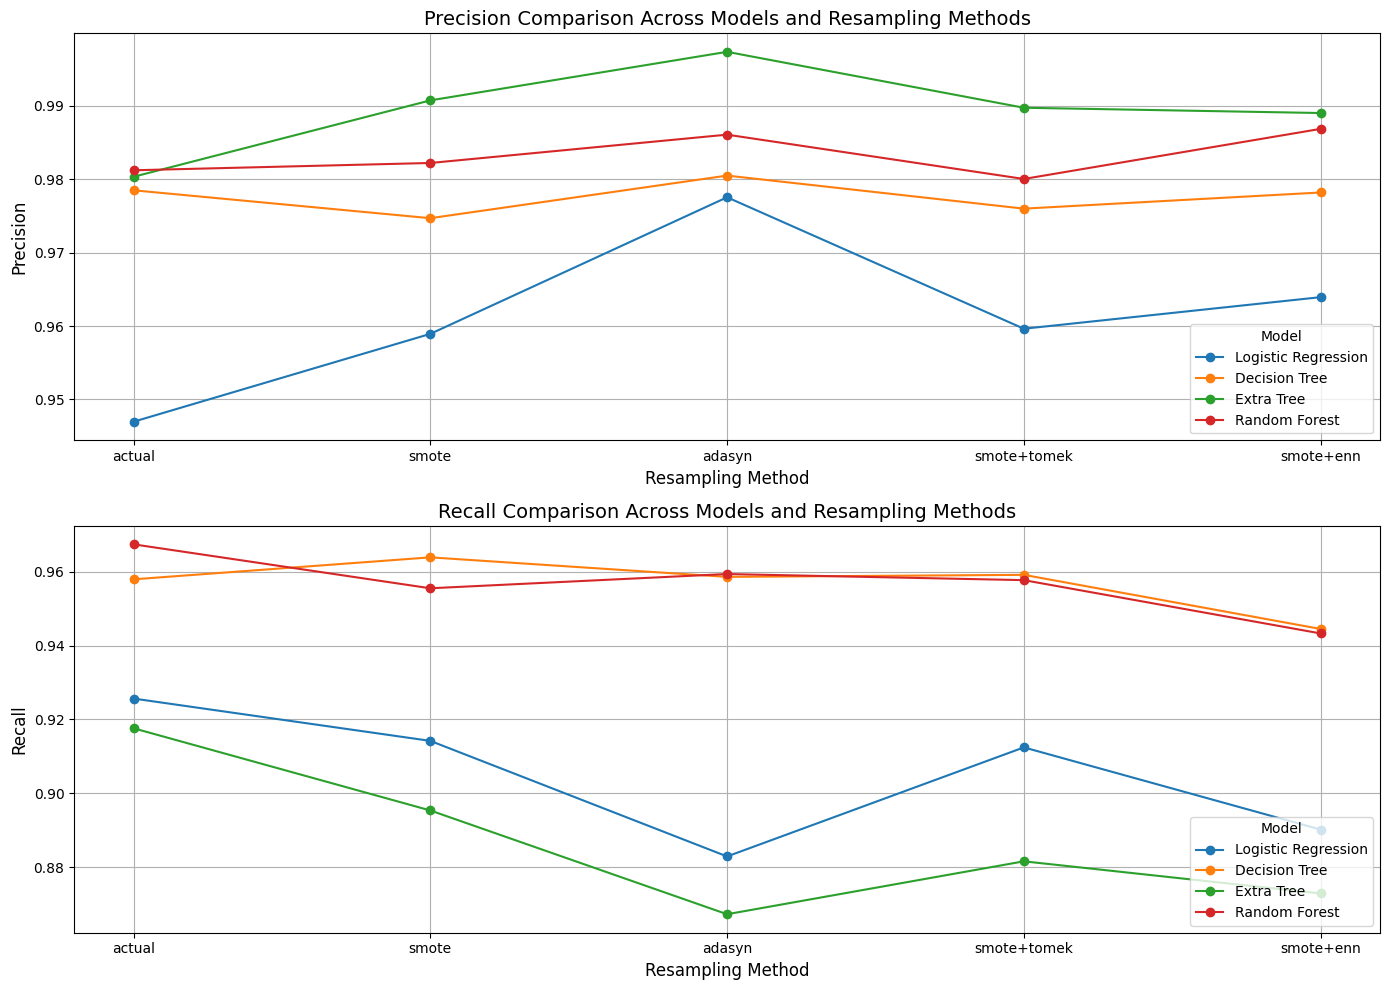

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Create the DataFrame from the lists
clf_eval_df = pd.DataFrame({
    'model': model,
    'resample': resample,
    'precision': precision,
    'recall': recall,
    'f1-score': F1score,
    'AUC-ROC': AUCROC
})

# Set up the figure for precision and recall
plt.figure(figsize=(14, 10))

# Precision Plot
plt.subplot(2, 1, 1)
for model_name in clf_eval_df['model'].unique():
    subset = clf_eval_df[clf_eval_df['model'] == model_name]
    plt.plot(subset['resample'], subset['precision'], marker='o', label=model_name)
plt.title('Precision Comparison Across Models and Resampling Methods', fontsize=14)
plt.ylabel('Precision', fontsize=12)
plt.xlabel('Resampling Method', fontsize=12)
plt.legend(title='Model', loc='lower right')
plt.grid(True)

# Recall Plot
plt.subplot(2, 1, 2)
for model_name in clf_eval_df['model'].unique():
    subset = clf_eval_df[clf_eval_df['model'] == model_name]
    plt.plot(subset['resample'], subset['recall'], marker='o', label=model_name)
plt.title('Recall Comparison Across Models and Resampling Methods', fontsize=14)
plt.ylabel('Recall', fontsize=12)
plt.xlabel('Resampling Method', fontsize=12)
plt.legend(title='Model', loc='lower right')
plt.grid(True)

# Adjust layout and display
plt.tight_layout()
plt.show()


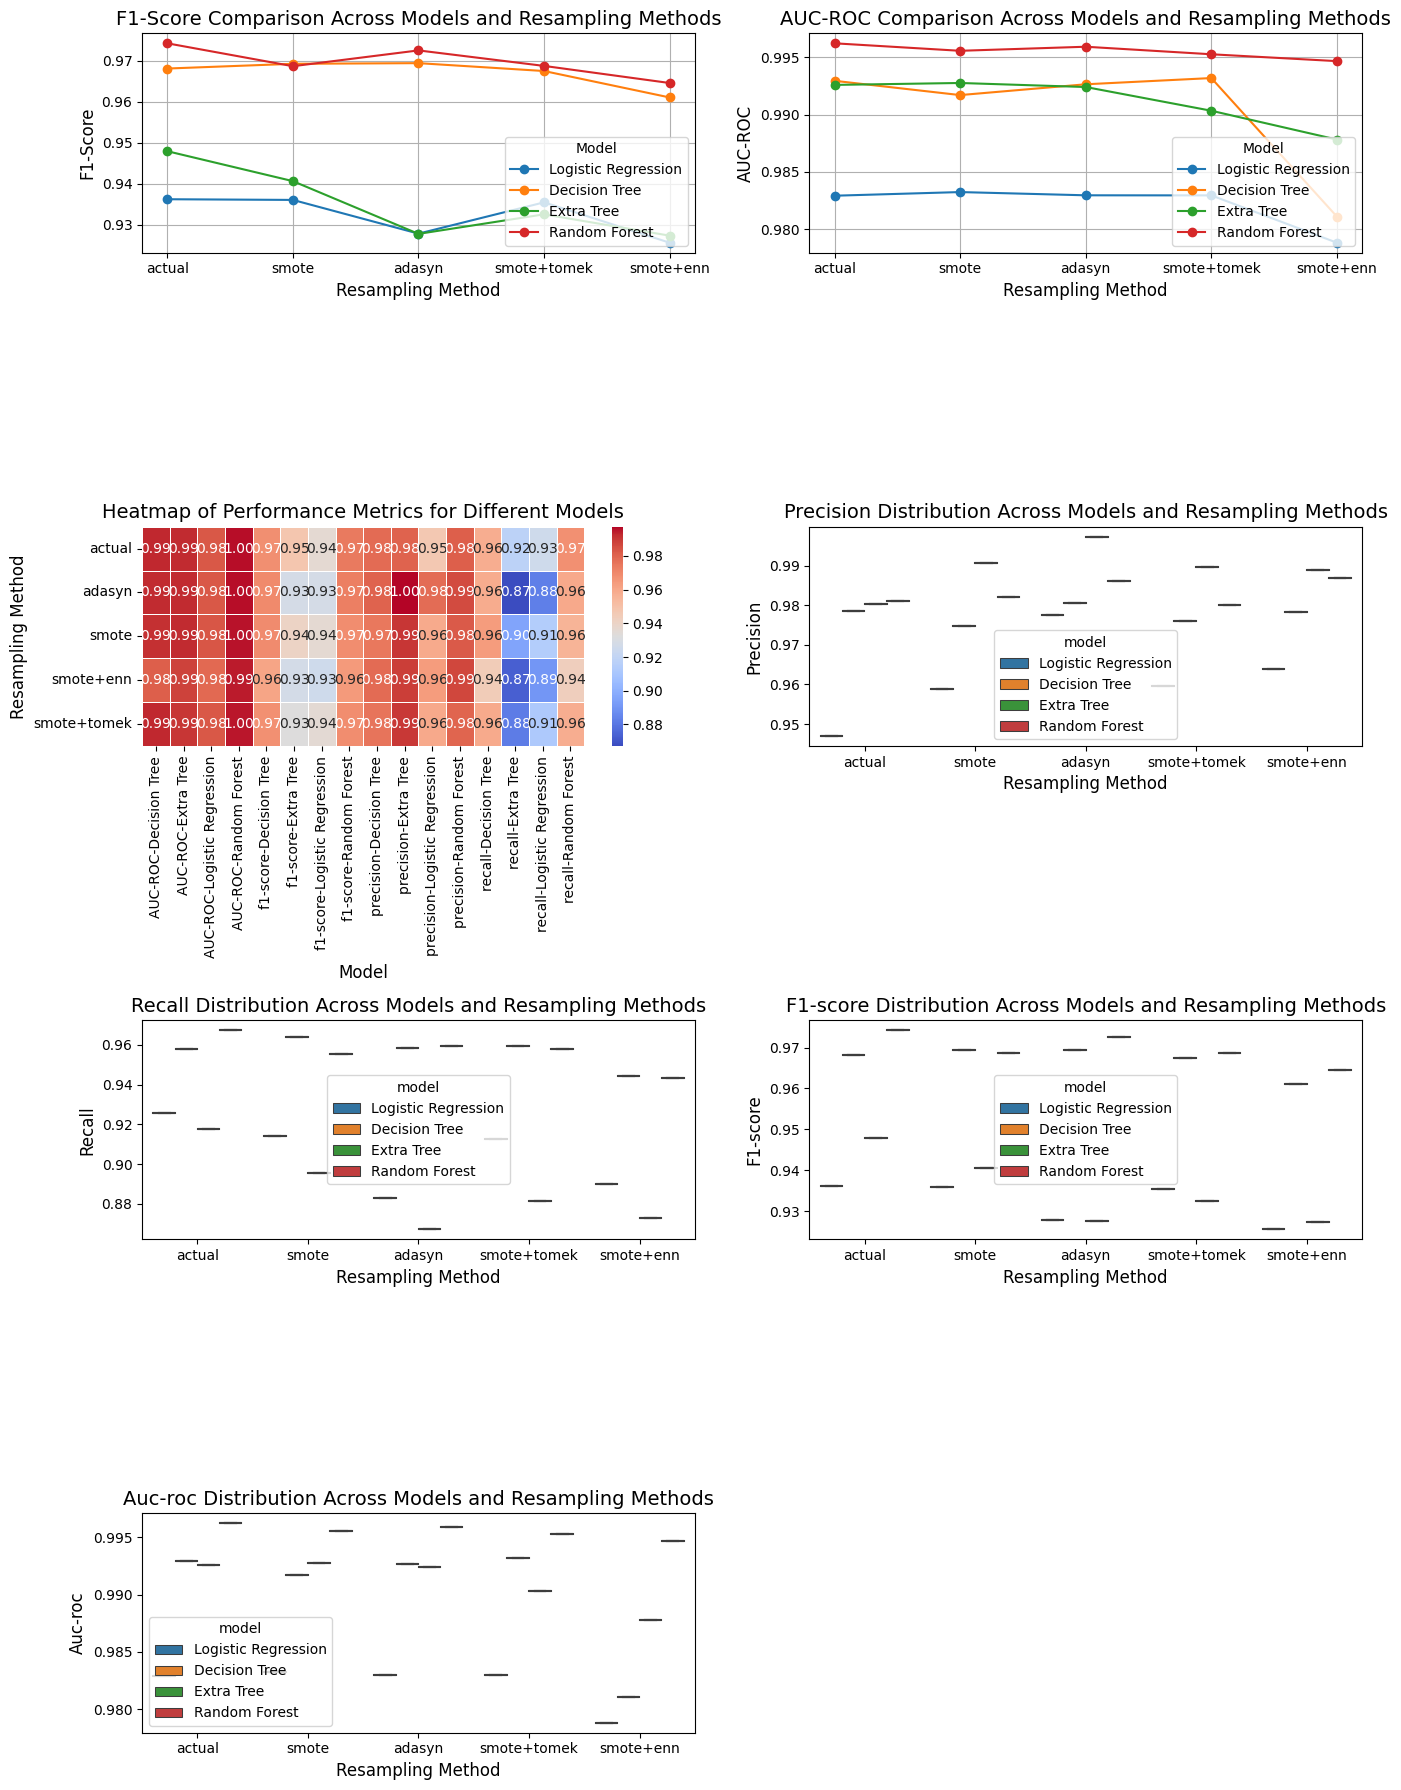

In [ ]:
# Set up the figure with a 4x2 grid
plt.figure(figsize=(14, 18))

# F1-Score Plot
plt.subplot(4, 2, 1)
for model_name in clf_eval_df['model'].unique():
    subset = clf_eval_df[clf_eval_df['model'] == model_name]
    plt.plot(subset['resample'], subset['f1-score'], marker='o', label=model_name)
plt.title('F1-Score Comparison Across Models and Resampling Methods', fontsize=14)
plt.ylabel('F1-Score', fontsize=12)
plt.xlabel('Resampling Method', fontsize=12)
plt.legend(title='Model', loc='lower right')
plt.grid(True)

# AUC-ROC Plot
plt.subplot(4, 2, 2)
for model_name in clf_eval_df['model'].unique():
    subset = clf_eval_df[clf_eval_df['model'] == model_name]
    plt.plot(subset['resample'], subset['AUC-ROC'], marker='o', label=model_name)
plt.title('AUC-ROC Comparison Across Models and Resampling Methods', fontsize=14)
plt.ylabel('AUC-ROC', fontsize=12)
plt.xlabel('Resampling Method', fontsize=12)
plt.legend(title='Model', loc='lower right')
plt.grid(True)

# Heatmap of Metrics (Precision, Recall, F1-Score, AUC-ROC)
heatmap_data = clf_eval_df.pivot_table(index='resample', columns='model', values=['precision', 'recall', 'f1-score', 'AUC-ROC'])
plt.subplot(4, 2, 3)
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Performance Metrics for Different Models', fontsize=14)
plt.ylabel('Resampling Method', fontsize=12)
plt.xlabel('Model', fontsize=12)

# Boxplot for Precision, Recall, F1-Score, and AUC-ROC
metrics = ['precision', 'recall', 'f1-score', 'AUC-ROC']
for i, metric in enumerate(metrics, start=4):
    plt.subplot(4, 2, i)
    sns.boxplot(x='resample', y=metric, data=clf_eval_df, hue='model')
    plt.title(f'{metric.capitalize()} Distribution Across Models and Resampling Methods', fontsize=14)
    plt.ylabel(metric.capitalize(), fontsize=12)
    plt.xlabel('Resampling Method', fontsize=12)

# Adjust layout and display
plt.tight_layout()
plt.show()


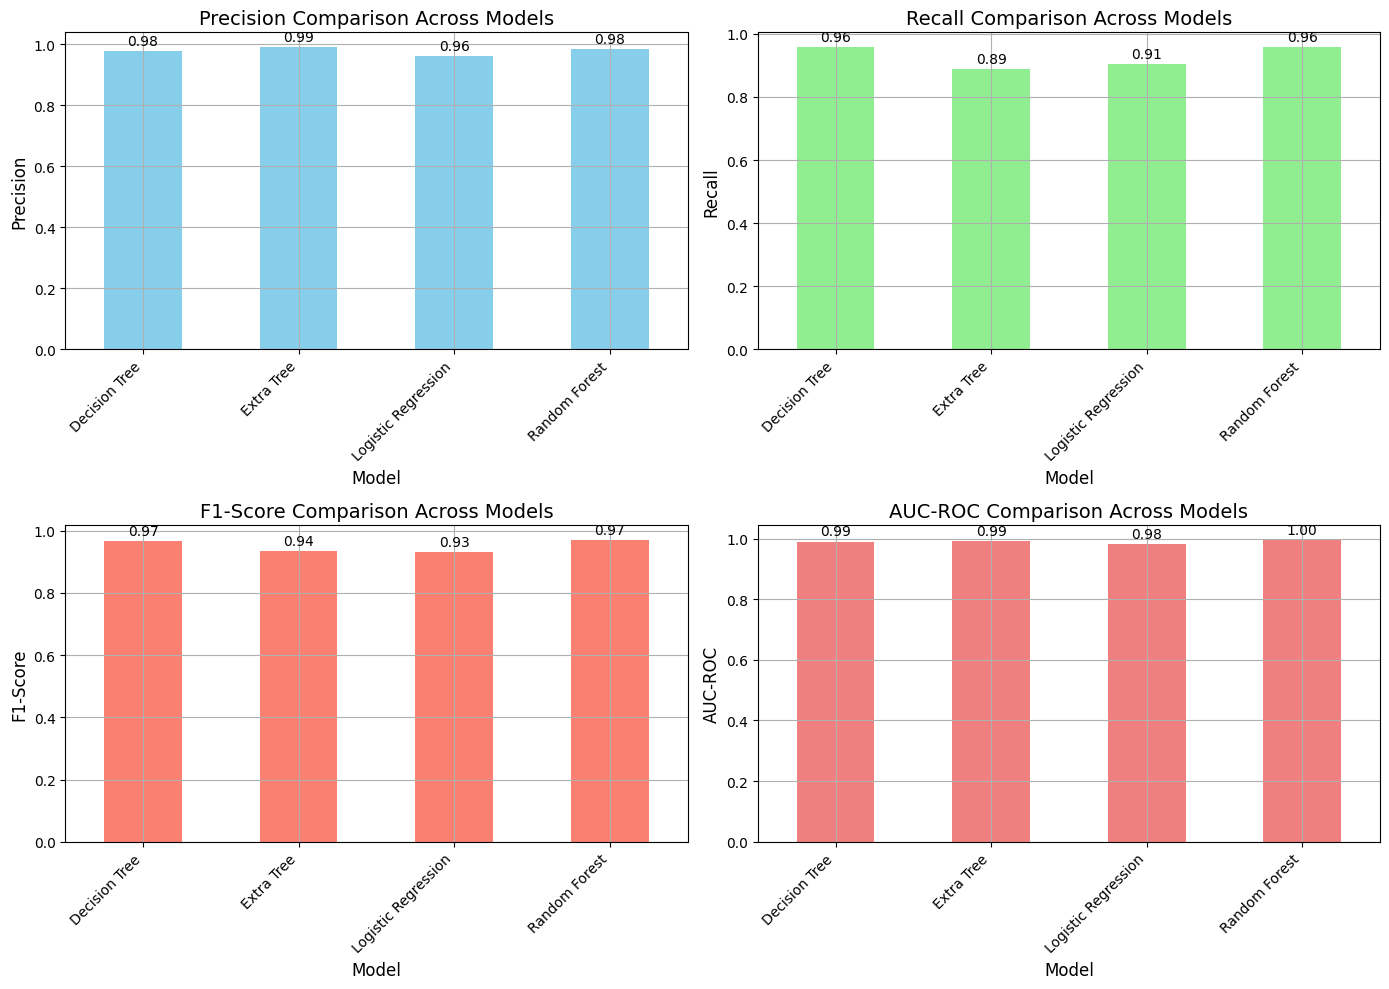

In [ ]:
# Set up the figure size
plt.figure(figsize=(14, 10))

# Create a bar chart for Precision Comparison
plt.subplot(2, 2, 1)
precision_means = clf_eval_df.groupby('model')['precision'].mean()
ax1 = precision_means.plot(kind='bar', color='skyblue')
plt.title('Precision Comparison Across Models', fontsize=14)
plt.ylabel('Precision', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Adding the precision scores inside the bars
for i, v in enumerate(precision_means):
    ax1.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=10, color='black')

plt.grid(True)

# Create a bar chart for Recall Comparison
plt.subplot(2, 2, 2)
recall_means = clf_eval_df.groupby('model')['recall'].mean()
ax2 = recall_means.plot(kind='bar', color='lightgreen')
plt.title('Recall Comparison Across Models', fontsize=14)
plt.ylabel('Recall', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Adding the recall scores inside the bars
for i, v in enumerate(recall_means):
    ax2.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=10, color='black')

plt.grid(True)

# Create a bar chart for F1-Score Comparison
plt.subplot(2, 2, 3)
f1_means = clf_eval_df.groupby('model')['f1-score'].mean()
ax3 = f1_means.plot(kind='bar', color='salmon')
plt.title('F1-Score Comparison Across Models', fontsize=14)
plt.ylabel('F1-Score', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Adding the F1-score values inside the bars
for i, v in enumerate(f1_means):
    ax3.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=10, color='black')

plt.grid(True)

# Create a bar chart for AUC-ROC Comparison
plt.subplot(2, 2, 4)
aucroc_means = clf_eval_df.groupby('model')['AUC-ROC'].mean()
ax4 = aucroc_means.plot(kind='bar', color='lightcoral')
plt.title('AUC-ROC Comparison Across Models', fontsize=14)
plt.ylabel('AUC-ROC', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Adding the AUC-ROC values inside the bars
for i, v in enumerate(aucroc_means):
    ax4.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=10, color='black')

plt.grid(True)

# Adjust layout and display the charts
plt.tight_layout()
plt.show()


<Figure size 1400x800 with 0 Axes>

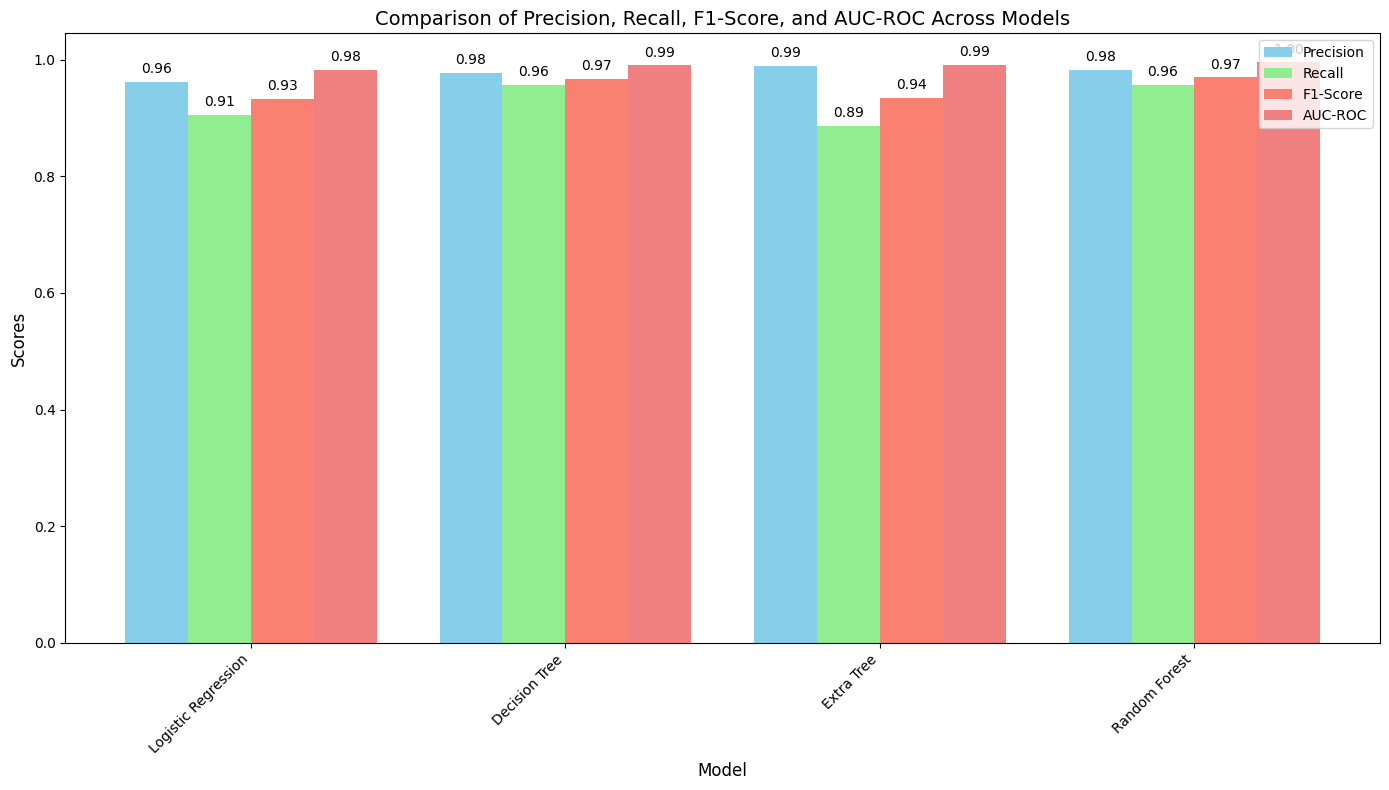

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set up the figure size
plt.figure(figsize=(14, 8))

# Reshape the data for grouped bar plot
metrics = ['precision', 'recall', 'f1-score', 'AUC-ROC']
model_names = clf_eval_df['model'].unique()

# Create a DataFrame to store mean values for each model and metric
metric_means = pd.DataFrame(index=model_names, columns=metrics)

for metric in metrics:
    metric_means[metric] = clf_eval_df.groupby('model')[metric].mean()

# Plotting the grouped bar chart
x = np.arange(len(model_names))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))

# Plot bars for each metric
bars1 = ax.bar(x - 1.5*width, metric_means['precision'], width, label='Precision', color='skyblue')
bars2 = ax.bar(x - 0.5*width, metric_means['recall'], width, label='Recall', color='lightgreen')
bars3 = ax.bar(x + 0.5*width, metric_means['f1-score'], width, label='F1-Score', color='salmon')
bars4 = ax.bar(x + 1.5*width, metric_means['AUC-ROC'], width, label='AUC-ROC', color='lightcoral')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Comparison of Precision, Recall, F1-Score, and AUC-ROC Across Models', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha='right', fontsize=10)
ax.legend()

# Adding values inside the bars
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
